In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm

pd.options.display.max_rows = 8

# Корреляционный анализ

In [2]:
df = pd.read_csv("../data/Ap_Rent_2023.csv", sep=';')
df

,rent,s,floor,rooms,district,walls,furniture
0,27500,35.0,5,1,3,1,1
1,29800,31.0,2,1,2,0,1
2,32000,30.0,4,1,3,1,1
3,50000,55.0,1,2,3,1,1
...,...,...,...,...,...,...,...
126,47800,54.0,1,2,1,1,1
127,34200,54.0,3,2,2,0,1
128,20800,12.0,4,1,3,1,0
129,34200,68.0,4,2,2,0,1


In [3]:
df.drop(['walls','furniture','district'],axis=1).describe()

,rent,s,floor,rooms
count,130.000000,130.000000,130.000000,130.000000
mean,31837.692308,36.439231,4.153846,1.376923
std,8412.175242,15.753831,2.680569,0.613358
min,18500.000000,11.000000,1.000000,1.000000
25%,25200.000000,21.250000,2.000000,1.000000
50%,32000.000000,36.000000,3.000000,1.000000
75%,36500.000000,45.000000,5.000000,2.000000
max,50000.000000,70.000000,12.000000,3.000000


In [4]:
stats.shapiro(df['rent'])

ShapiroResult(statistic=np.float64(0.9487043312214398), pvalue=np.float64(9.023533207396696e-05))

In [5]:
stats.shapiro(df['s'])

ShapiroResult(statistic=np.float64(0.9606575659311349), pvalue=np.float64(0.0008220715748812157))

## Связь целевого показателя rent и категориальных факторов

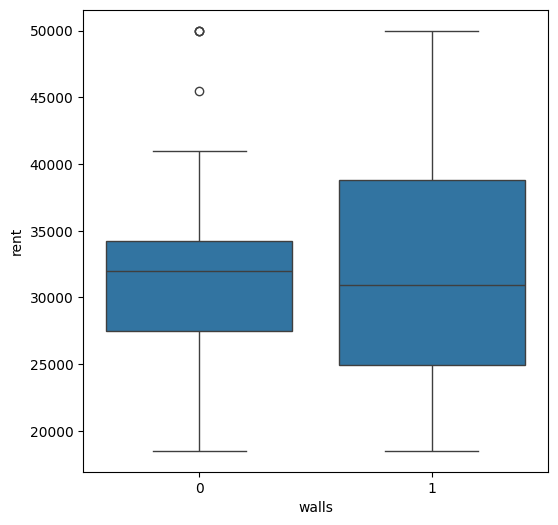

In [6]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='walls', y='rent', data=df)

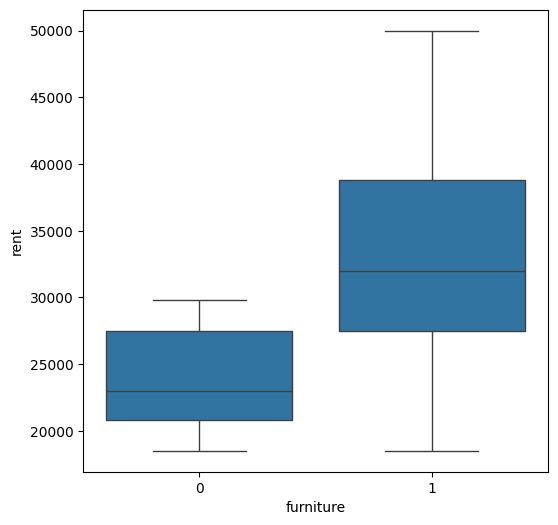

In [7]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='furniture', y='rent', data=df)

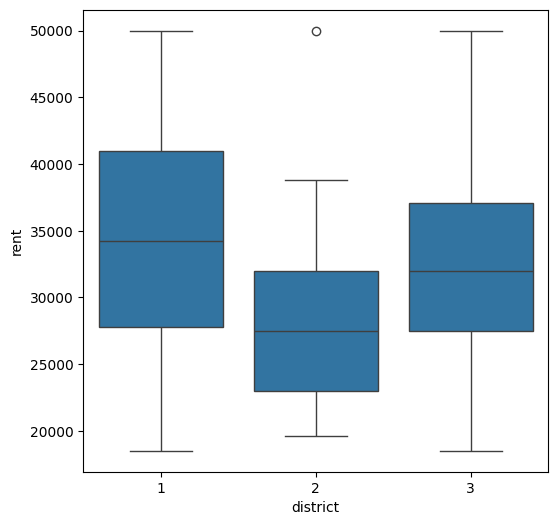

In [8]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='district', y='rent', data=df)

In [9]:
df.loc[(df['rent'] == 50000) & (df['district'] == 2)]

,rent,s,floor,rooms,district,walls,furniture
37,50000,64.0,3,3,2,0,1


In [10]:
df=df.drop(df.index[[37]])

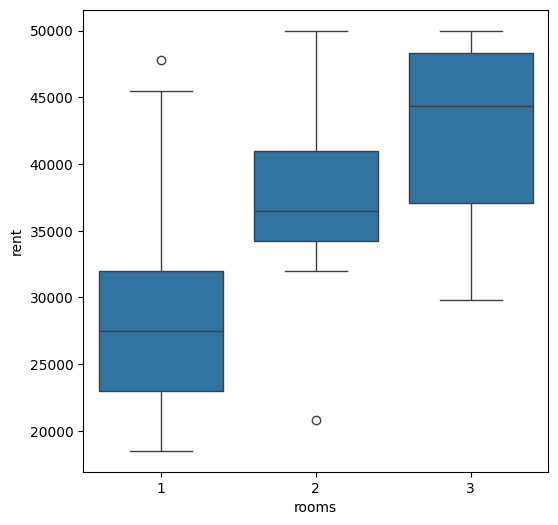

In [11]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='rooms', y='rent', data=df)

# Корреляционный анализ

## Связь целевого показателя rent с количественным показателем площади

<Axes: xlabel='s', ylabel='rent'>

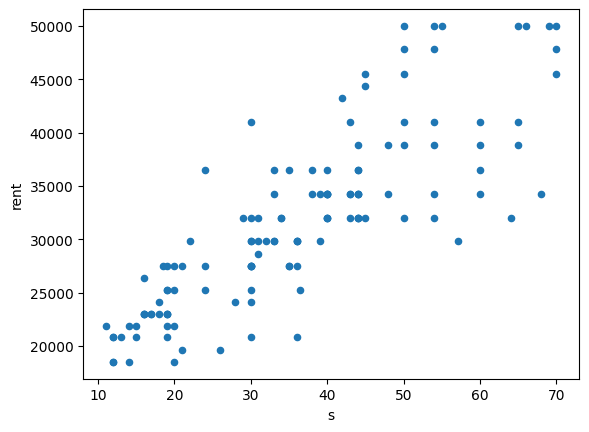

In [12]:
df.plot('s','rent',kind="scatter")

<Axes: xlabel='rooms', ylabel='rent'>

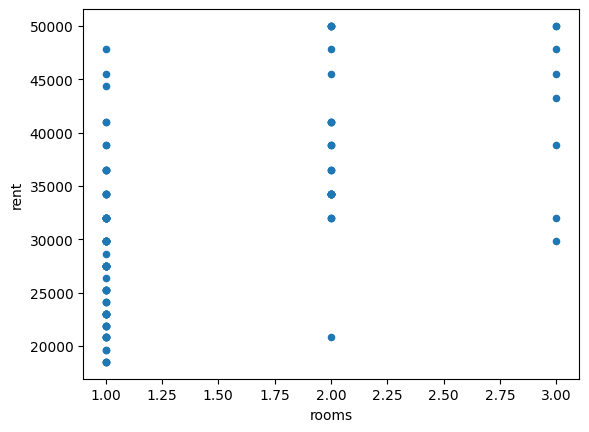

In [13]:
df.plot('rooms','rent',kind="scatter")

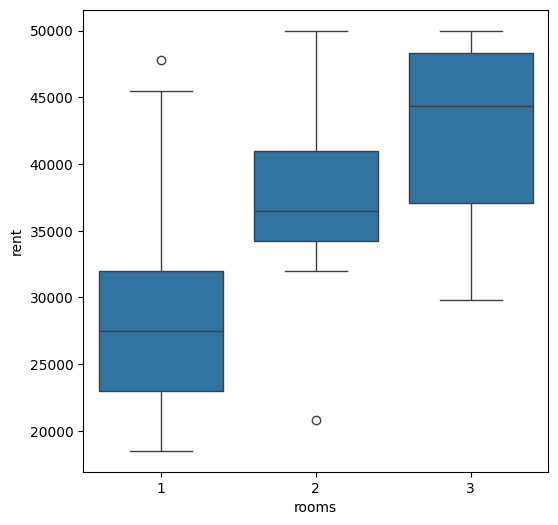

In [14]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='rooms', y='rent', data=df)

In [15]:
df[['rent','s','rooms']].corr(method='pearson') # количественная корреляция Пирсона

,rent,s,rooms
rent,1.000000,0.829161,0.592600
s,0.829161,1.000000,0.730449
rooms,0.592600,0.730449,1.000000


In [ ]:
df[['rent','s','rooms']].corr() # то же самое, по умолчанию Пирсон. Надо следить чтобы все факторы были количественными!!

,rent,s,rooms
rent,1.000000,0.829161,0.592600
s,0.829161,1.000000,0.730449
rooms,0.592600,0.730449,1.000000


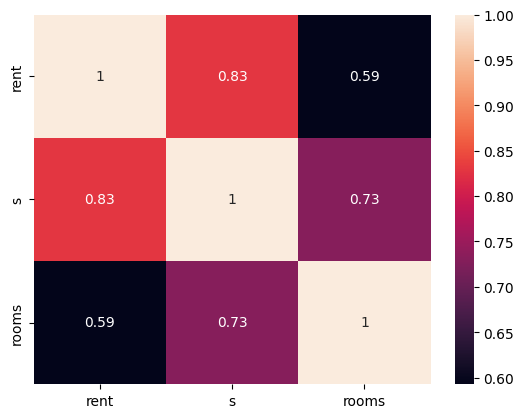

In [17]:
num = ['rent', 's', 'rooms']
hm = sns.heatmap(df[num].corr(),annot=True)

In [18]:
df[['rent','s','rooms','floor']].corr(method='spearman') # ранговая корреляция Спирмена

,rent,s,rooms,floor
rent,1.000000,0.857035,0.599251,0.383969
s,0.857035,1.000000,0.715424,0.413951
rooms,0.599251,0.715424,1.000000,0.158063
floor,0.383969,0.413951,0.158063,1.000000


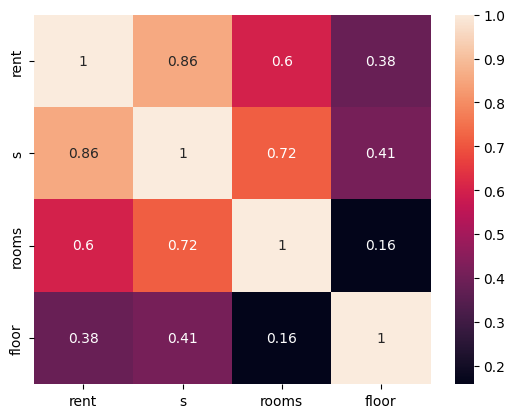

In [19]:
ran = ['rent', 's','rooms','floor']
hm = sns.heatmap(df[ran].corr(method = 'spearman'), annot=True)

### Проверка значимости корреляции

In [ ]:
scipy.stats.pearsonr(df.rent, df.s) 
# С вероятностью почти = 0 (pvalue=np.float64(7.101707498392363e-34)) истинность нулевой гипотезы
# следовательно можем отвергнуть нулевую гипотезу что корреляция равна 0
# следовательно связь статестически значимая 
# statistic=np.float64(0.8291605778493312) следовательно связь очень значимая

PearsonRResult(statistic=np.float64(0.8291605778493312), pvalue=np.float64(7.101707498392363e-34))

In [26]:
scipy.stats.pearsonr(df.rent, df.rooms)
# pvalue=np.float64(1.382008874275996e-13) также отклоняем нулевую гипотезу 
# следовательно показатели связаны

PearsonRResult(statistic=np.float64(0.5926001358217224), pvalue=np.float64(1.382008874275996e-13))

In [ ]:
scipy.stats.spearmanr(df.rent, df.floor)
# используем Спирмена так как этаж ранговый показатель
# pvalue=np.float64(7.0550083304872275e-06) следователньо связь есть 
# statistic=np.float64(0.38396878193353856) связь досточно значимая

SignificanceResult(statistic=np.float64(0.38396878193353856), pvalue=np.float64(7.0550083304872275e-06))

In [ ]:
scipy.stats.pearsonr(df.s, df.rooms)
# очевидно связь есть => будет проблема для регрессионной модели

PearsonRResult(statistic=np.float64(0.7304486159283048), pvalue=np.float64(8.94366027103074e-23))

In [ ]:
scipy.stats.spearmanr(df.rooms, df.floor)
# pvalue=np.float64(0.07360852836026584) > 0.05 следовательно нет оснований отклонить нулевую гипотезу
# принимаем нулевую гипотезу => свять статистически не значимая

SignificanceResult(statistic=np.float64(0.15806284415685032), pvalue=np.float64(0.07360852836026584))

## Связь категориальных признаков друг с другом

In [ ]:
# два бинарных показателя
WF=pd.crosstab(df['walls'],df['furniture']); WF
# для хи2 надо чтобы каждая частота была не меньше 5, наше самое маленькое =7, 
# следовательно можно его применять

furniture,0,1
walls,,
0,7,42
1,14,66


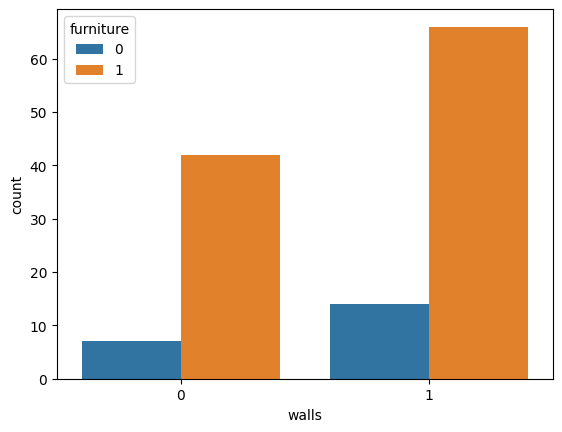

In [29]:
sns.countplot(x=df['walls'], hue=df['furniture']);

In [ ]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
 
print(f"test Statistics: {chi2}\ndegrees of freedom: {f}\np-value: {prob}\n")
# p-value: 0.81478 с большой вероятностью надо принять нулевую гипотезу
# нулевая гипотеза о том что признаки независимы 

test Statistics: 0.054879585762876604
degrees of freedom: 1
p-value: 0.8147800917238359



In [33]:
# если бы мы не могли применить хи2 (хотя бы 1 частота меньше или равна 5), 
# то применяем критерий Фишера
stats.fisher_exact(WF)

SignificanceResult(statistic=np.float64(0.7857142857142857), pvalue=np.float64(0.8066490085960722))

In [34]:
WD=pd.crosstab(df['walls'],df['district']); WD

district,1,2,3
walls,,,
0,9,23,17
1,29,20,31


<Axes: xlabel='district', ylabel='count'>

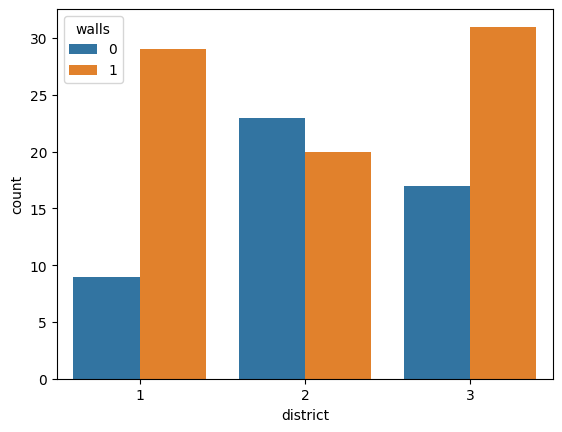

In [35]:
sns.countplot(x=df['district'], hue=df['walls'])

In [ ]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(WD)
 
print(f"test Statistics: {chi2}\ndegrees of freedom: {f}\np-value: {prob}\n")
# p-value: 0.02 надо отказаться от нулевой гипотезы 
# нулевая гипотеза о том что признаки независимы 
# следовательно признаки зависимы с большой вероятностью

test Statistics: 7.820993051825996
degrees of freedom: 2
p-value: 0.020030552903560955



зависимые признаки в регрессионной модели будут соревноваться за то чтобы влиять на целевую
поэтому придется исключить какой-то из признаков, чтобы мультиколленеарность не мешала построению модели

### Проверка корреляции количественного показателя с категориальным фактором путем проверки ПДС и расчета корреляционного отношения

In [37]:
df_w0 = df[df['walls']==0]
df_w1 = df[df['walls']==1]

In [38]:
# Общее среднее
m=df['rent'].mean(); m

np.float64(31696.899224806202)

In [39]:
# Частные внутригрупповые средние
m_gr=df.groupby('walls')[['rent']].mean(); m_gr

,rent
walls,
0,31312.244898
1,31932.500000


In [40]:
# Объемы совокупностей
n=df['rent'].shape[0]
n0=df_w0.shape[0]
n1=df_w1.shape[0]
print(n, n0, n1)

129 49 80


In [41]:
m0=m_gr.iloc[0,0]
m1=m_gr.iloc[1,0]

In [53]:
# Проверка 
m == (m0*n0+m1*n1)/n

np.True_

In [43]:
# Общая исперсия
d=df['rent'].var()*(n-1)/n; d

np.float64(68187742.3231777)

In [44]:
# Частные внутригрупповые дисперсии
d_gr=df.groupby('walls')[['rent']].var(); d_gr

,rent
walls,
0,4.950360e+07
1,8.111842e+07


In [45]:
d0=d_gr.iloc[0,0]*(n0-1)/n0
d1=d_gr.iloc[1,0]*(n1-1)/n1

In [ ]:
# Средняя внутригрупповая дисперсия
d_gr_ = (d0*n0+d1*n1)/n; d_gr_

np.float64(68097117.46559086)

In [47]:
# Межгрупповая дисперсия
d_int = (n0*(m0-m)**2+n1*(m1-m)**2)/n; d_int

np.float64(90624.85758680642)

In [48]:
d_gr_ + d_int

np.float64(68187742.32317767)

In [56]:
d - (d_gr_ + d_int) # Почти равны

np.float64(2.9802322387695312e-08)

In [49]:
# Коффициент детерминации
d_int/d

np.float64(0.0013290491003102492)

In [50]:
# Корреляцинное отношения
np.sqrt(d_int/d)

np.float64(0.03645612568979662)

Задание. проверить на уровне значимости 0.05 статистическую значимость связи площади и этажа, выбрав корректный коэффициент для анализа связи.

In [52]:
scipy.stats.pearsonr(df.s, df.rooms)
# С вероятностью почти = 0 (pvalue=np.float64(8.94366027103074e-23)) истинность нулевой гипотезы
# следовательно можем отвергнуть нулевую гипотезу что корреляция равна 0
# следовательно связь статестически значимая 
# statistic=np.float64(0.7304486159283048) следовательно связь очень значимая

PearsonRResult(statistic=np.float64(0.7304486159283048), pvalue=np.float64(8.94366027103074e-23))

# Задание 2

Dutch sensory modality norms
Laura J. Speed1 & Marc Brybaert 2

In [ ]:
file_path = '../data/SpeedBrysbaert_Norms.csv'  
df_sb = pd.read_csv(file_path, sep=';')

df_sb.head()
# почти все оценки (оценочные показатели) ранговые, 
# принято допущение что разницы между рангами равны, 
# принятая интервальность дает нам право считать среднее, 
# следовательно можно с этой оговоркой работать с ними как с количественной величиной

,Woord,Horen,Zien,Ruiken,Proeven,Voelen,Sensaties,Modality,ModalityExclusivity,MaxPercStrength,...,Prevalence,Length,Nsyl,N_phonemes,PoS,OLD20,DLP_RT,DLP_Acc,DCP_RT,DCP_Acc
0,aai,0.2,3.1,0.00,0.00,4.40,0.80,Voelen,0.517647,4.40,...,1.714174,3,1,2,N,1.00,537.85,0.95000,1024.92,0.97
1,aaien,0.0,2.7,0.00,0.00,4.90,0.90,Voelen,0.576471,4.90,...,2.586581,5,2,3,WW,1.25,571.50,0.95122,991.05,1.00
2,aal,0.0,3.4,0.90,0.30,1.40,0.40,Zien,0.531250,3.40,...,1.830408,3,1,2,N,1.00,613.63,0.80000,1075.17,0.97
3,aalbes,0.0,4.0,1.92,4.17,2.92,0.25,Proeven,0.314465,4.17,...,1.562257,6,2,5,N,2.00,593.23,0.82500,1041.53,0.96
4,aalmoes,0.5,2.9,0.00,0.00,1.50,0.30,Zien,0.557692,2.90,...,2.192199,7,2,5,N,2.55,634.01,0.92500,953.61,0.98


In [61]:
df_sb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24036 entries, 0 to 24035
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Woord                 24036 non-null  object 
 1   Horen                 24036 non-null  float64
 2   Zien                  24036 non-null  float64
 3   Ruiken                24036 non-null  float64
 4   Proeven               24036 non-null  float64
 5   Voelen                24036 non-null  float64
 6   Sensaties             24036 non-null  float64
 7   Modality              24036 non-null  object 
 8   ModalityExclusivity   24036 non-null  float64
 9   MaxPercStrength       24036 non-null  float64
 10  AvModalityStrength    24036 non-null  float64
 11  Minkowski3            24036 non-null  float64
 12  Concreteness          24036 non-null  float64
 13  ConcretenessCategory  24036 non-null  object 
 14  Imageability          24036 non-null  object 
 15  ImageabilityCategor

In [62]:
df_sb['Modality'].value_counts()

Modality
Zien         17498
Horen         2567
Sensaties     2026
Proeven        613
Voelen         589
Joint          582
Ruiken         161
Name: count, dtype: int64

<Axes: >

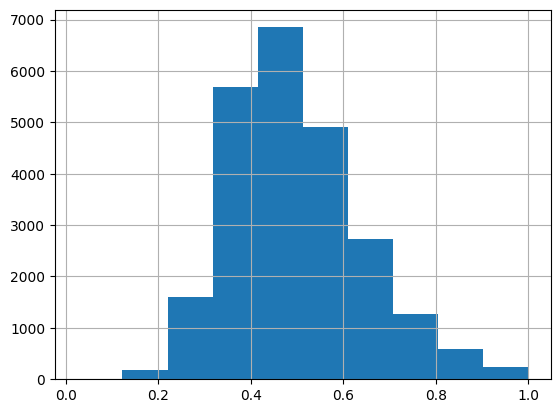

In [63]:
df_sb['ModalityExclusivity'].hist()

In [64]:
# Описательные статистики
df_sb['ModalityExclusivity'].describe()

count    24036.000000
mean         0.497316
std          0.142674
min          0.025316
25%          0.394366
50%          0.478261
75%          0.581081
max          1.000000
Name: ModalityExclusivity, dtype: float64

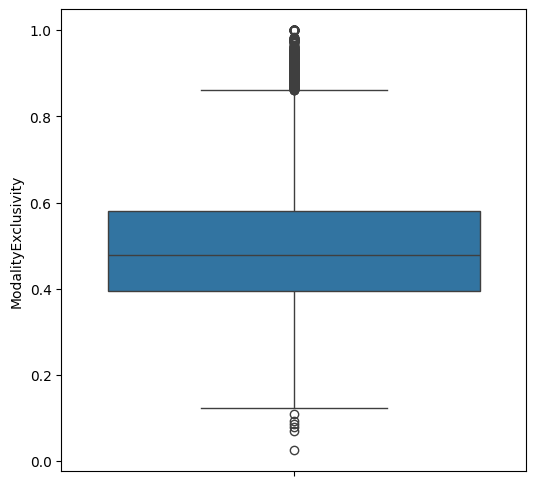

In [65]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(y="ModalityExclusivity", data=df_sb)

<Axes: >

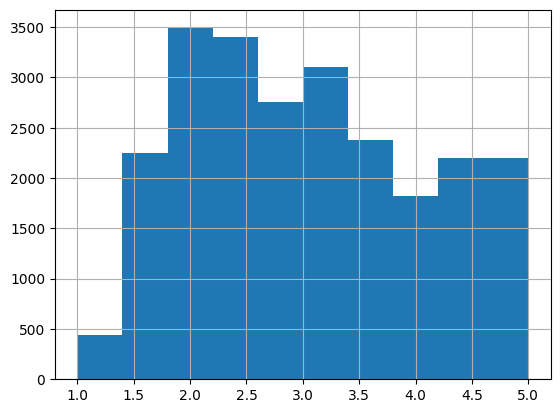

In [67]:
df_sb['Concreteness'].hist()

In [68]:
# Описательные статистики
df_sb['Concreteness'].describe()

count    24036.000000
mean         3.021016
std          1.019765
min          1.000000
25%          2.133333
50%          2.933333
75%          3.866667
max          5.000000
Name: Concreteness, dtype: float64

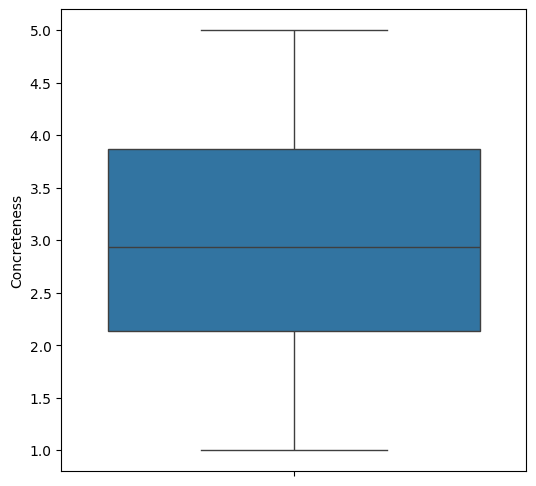

In [69]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(y="Concreteness", data=df_sb)

In [70]:
X=df_sb[['Horen','Zien','Ruiken','Proeven','Voelen','Sensaties']]
X

,Horen,Zien,Ruiken,Proeven,Voelen,Sensaties
0,0.20,3.10,0.00,0.00,4.40,0.80
1,0.00,2.70,0.00,0.00,4.90,0.90
2,0.00,3.40,0.90,0.30,1.40,0.40
3,0.00,4.00,1.92,4.17,2.92,0.25
...,...,...,...,...,...,...
24032,3.25,4.25,2.25,1.00,2.50,0.25
24033,0.92,3.92,2.58,0.25,1.17,0.50
24034,1.08,2.58,0.17,0.00,1.50,1.67
24035,1.08,2.25,0.42,0.17,1.25,2.08


In [71]:
Y=df_sb[['Concreteness']]
Y

,Concreteness
0,4.071429
1,4.133333
2,4.692308
3,4.733333
...,...
24032,4.600000
24033,3.000000
24034,2.866667
24035,2.533333


In [72]:
X.corr()

,Horen,Zien,Ruiken,Proeven,Voelen,Sensaties
Horen,1.000000,-0.090255,-0.126828,-0.162467,-0.156464,0.219187
Zien,-0.090255,1.000000,0.256869,0.153960,0.558252,-0.213318
Ruiken,-0.126828,0.256869,1.000000,0.697768,0.266620,-0.064437
Proeven,-0.162467,0.153960,0.697768,1.000000,0.212626,-0.041444
Voelen,-0.156464,0.558252,0.266620,0.212626,1.000000,-0.119524
Sensaties,0.219187,-0.213318,-0.064437,-0.041444,-0.119524,1.000000


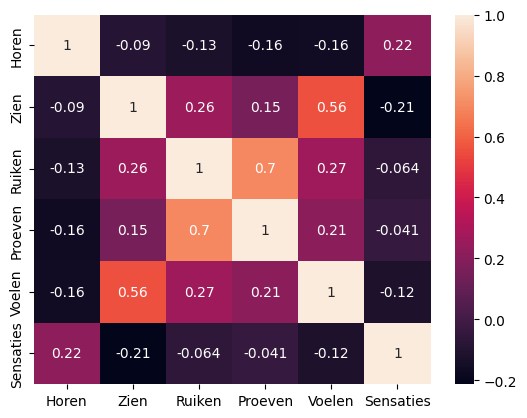

In [73]:
hm = sns.heatmap(X.corr(),annot=True)

In [74]:
df_sb[['Concreteness', 'Horen', 'Zien', 'Ruiken', 'Proeven', 'Voelen', 'Sensaties']].corr()

,Concreteness,Horen,Zien,Ruiken,Proeven,Voelen,Sensaties
Concreteness,1.000000,-0.107000,0.695022,0.364797,0.271848,0.620741,-0.326970
Horen,-0.107000,1.000000,-0.090255,-0.126828,-0.162467,-0.156464,0.219187
Zien,0.695022,-0.090255,1.000000,0.256869,0.153960,0.558252,-0.213318
Ruiken,0.364797,-0.126828,0.256869,1.000000,0.697768,0.266620,-0.064437
Proeven,0.271848,-0.162467,0.153960,0.697768,1.000000,0.212626,-0.041444
Voelen,0.620741,-0.156464,0.558252,0.266620,0.212626,1.000000,-0.119524
Sensaties,-0.326970,0.219187,-0.213318,-0.064437,-0.041444,-0.119524,1.000000


In [76]:
for t in ['Horen', 'Zien', 'Ruiken', 'Proeven', 'Voelen', 'Sensaties']:
    print(scipy.stats.pearsonr(df_sb.MaxPercStrength, df_sb[t]))


PearsonRResult(statistic=np.float64(0.1538869888128246), pvalue=np.float64(2.7953390947481165e-127))
PearsonRResult(statistic=np.float64(0.8226024670745786), pvalue=np.float64(0.0))
PearsonRResult(statistic=np.float64(0.33046383930435624), pvalue=np.float64(0.0))
PearsonRResult(statistic=np.float64(0.2541278882077589), pvalue=np.float64(0.0))
PearsonRResult(statistic=np.float64(0.5192688993827173), pvalue=np.float64(0.0))
PearsonRResult(statistic=np.float64(-0.03484108704762927), pvalue=np.float64(6.554862582965985e-08))
